Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

**Mounting the zipped folder manually**

In [1]:
cd drive/MyDrive/AI-ML

/content/drive/MyDrive/AI-ML


**Unzipping the dataset**

In [38]:
#unzipping the file
!unzip CNN_assignment.zip

Archive:  CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating: Skin cancer ISIC The I

### Importing the required libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("./Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("./Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


**Creating the dataset**

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

Creating train dataset

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


Creating validation dataset

In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


Listing the class names

In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)


['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualizing the data
Creating code to visualize one instance of all the nine classes present in the dataset

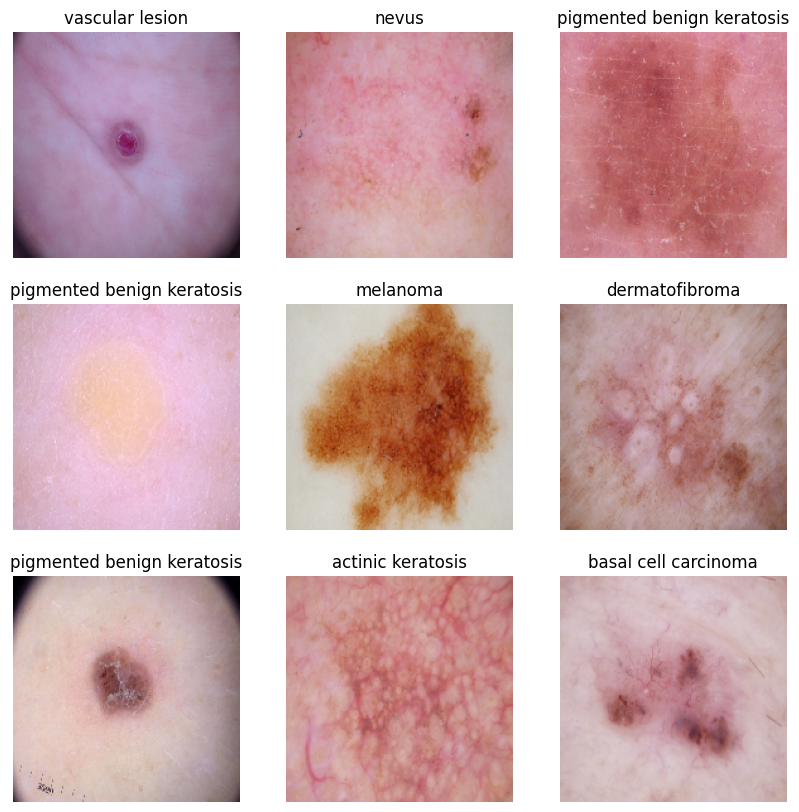

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Standardizing the data to be in [0,1] and creating the model

In [12]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compiling the model
- Optimiser: Adam
- Loss Function: SparseCategoricalCrossentropy

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Training the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 351s 1s/step - loss: 2.0074 - accuracy: 0.2522 - val_loss: 1.7920 - val_accuracy: 0.3221
Epoch 2/20
56/56 [==============================] - 1s 21ms/step - loss: 1.6972 - accuracy: 0.4018 - val_loss: 1.5822 - val_accuracy: 0.4631
Epoch 3/20
56/56 [==============================] - 1s 20ms/step - loss: 1.4891 - accuracy: 0.4732 - val_loss: 1.4061 - val_accuracy: 0.5213
Epoch 4/20
56/56 [==============================] - 1s 20ms/step - loss: 1.4124 - accuracy: 0.5100 - val_loss: 1.4303 - val_accuracy: 0.5280
Epoch 5/20
56/56 [==============================] - 1s 20ms/step - loss: 1.3310 - accuracy: 0.5324 - val_loss: 1.4528 - val_accuracy: 0.5034
Epoch 6/20
56/56 [==============================] - 1s 20ms/step - loss: 1.2625 - accuracy: 0.5519 - val_loss: 1.3685 - val_accuracy: 0.5481
Epoch 7/20
56/56 [==============================] - 1s 20ms/step - loss: 1.1873 - accuracy: 0.5865 - val_loss: 1.5467 - val_accuracy: 0.4877
Epoch 8/20
56

### Visualizing training results

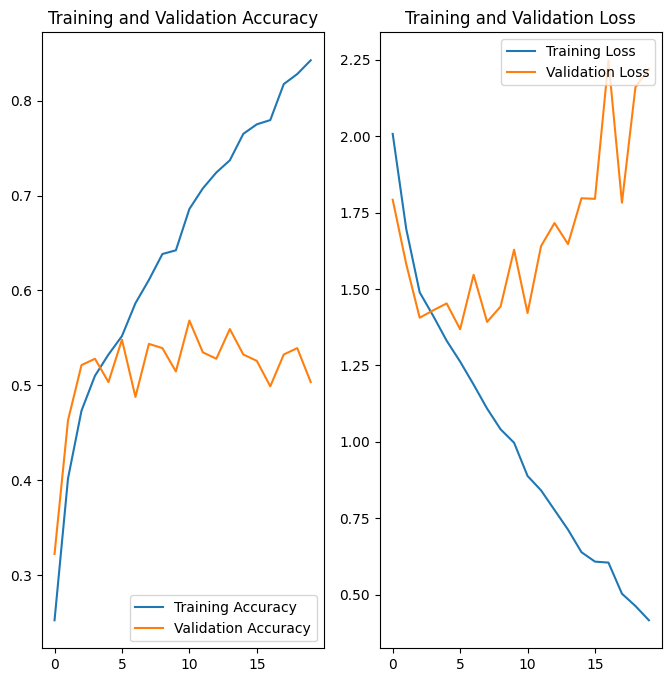

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings:**
- The model has training accuracy for around 85% and validation accouracy of 50%, these shows a clear sign of overfitting.
- Using the Data augmentation strategy by using horizontal and vertical flips, hoping to improve the figures

### Using Data Augmentation

In [17]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

Viewing the augmenatation for one instance of training image

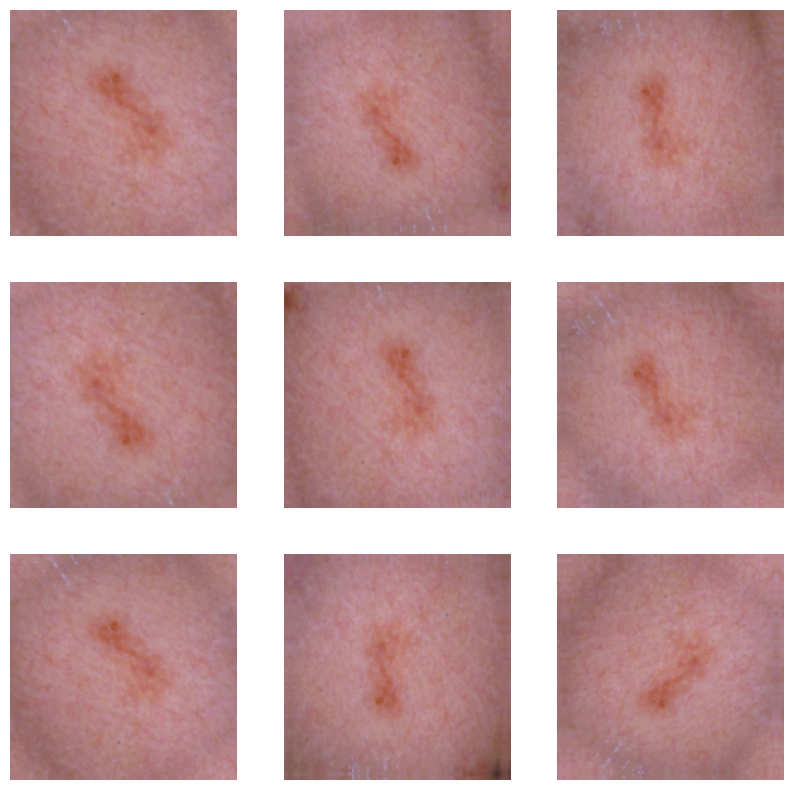

In [18]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Creating the second model with augmentation
- Using Dropout too to avoid overfitting

In [19]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

### Compling the augmented model

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the augmented model

In [21]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 35ms/step - loss: 2.0279 - accuracy: 0.2595 - val_loss: 1.9673 - val_accuracy: 0.2819
Epoch 2/20
56/56 [==============================] - 2s 30ms/step - loss: 1.7412 - accuracy: 0.3633 - val_loss: 1.6783 - val_accuracy: 0.4004
Epoch 3/20
56/56 [==============================] - 2s 30ms/step - loss: 1.5962 - accuracy: 0.4330 - val_loss: 1.5602 - val_accuracy: 0.4452
Epoch 4/20
56/56 [==============================] - 2s 29ms/step - loss: 1.4948 - accuracy: 0.4872 - val_loss: 1.4924 - val_accuracy: 0.4855
Epoch 5/20
56/56 [==============================] - 2s 32ms/step - loss: 1.4208 - accuracy: 0.5050 - val_loss: 1.4283 - val_accuracy: 0.4966
Epoch 6/20
56/56 [==============================] - 2s 31ms/step - loss: 1.3676 - accuracy: 0.5184 - val_loss: 1.4654 - val_accuracy: 0.4944
Epoch 7/20
56/56 [==============================] - 2s 30ms/step - loss: 1.3202 - accuracy: 0.5340 - val_loss: 1.3626 - val_accuracy: 0.5145
Epoch 8/20
56

### Visualizing the results

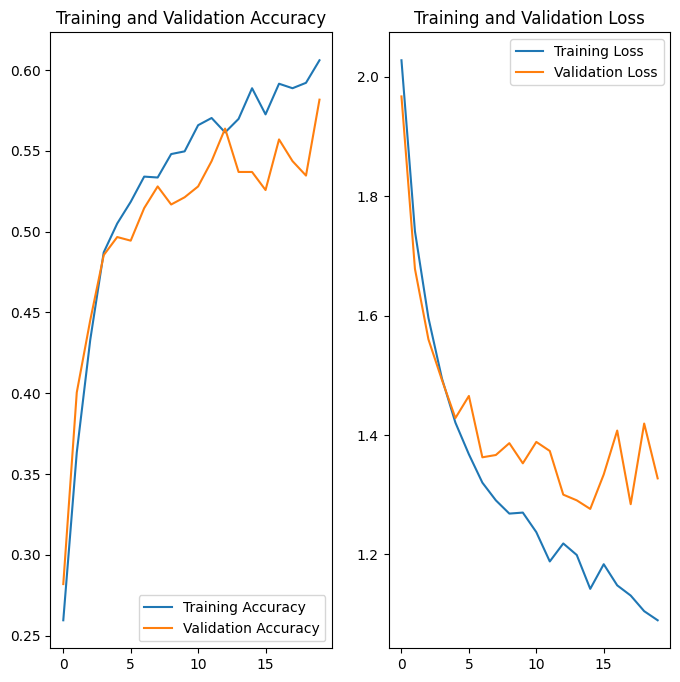

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings**:
- Training and validation graphs seems to go in parallel and is approximately same.
- Low Training and Validation accuracy suggests underfiiting and model is not able to capture the patterns.
- Model is not good

**Finding the distribution of classes in the training dataset**

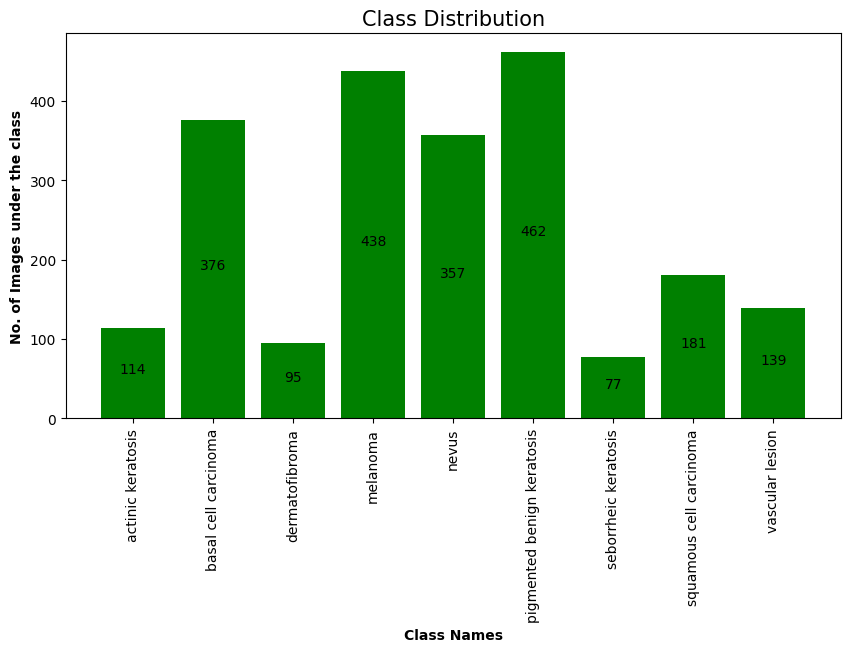



Proportional weight distribution:


actinic keratosis  has proportional weightage of  0.05
basal cell carcinoma  has proportional weightage of  0.17
dermatofibroma  has proportional weightage of  0.04
melanoma  has proportional weightage of  0.2
nevus  has proportional weightage of  0.16
pigmented benign keratosis  has proportional weightage of  0.21
seborrheic keratosis  has proportional weightage of  0.03
squamous cell carcinoma  has proportional weightage of  0.08
vascular lesion  has proportional weightage of  0.06


In [49]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

cl_dict={}
for cl in class_names:
  cl_dict[cl]=len(list(data_dir_train.glob(cl+'/*')))

cl_name = list(cl_dict.keys())
cl_length = list(cl_dict.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(cl_name, cl_length, color ='green')

plt.xlabel("Class Names",fontweight='bold',fontsize=10)
plt.xticks(rotation=90)
plt.ylabel("No. of Images under the class",fontweight='bold',fontsize=10)

addlabels(cl_name, cl_length)

plt.title("Class Distribution",fontsize=15)
plt.show()

print('\n')
print("Proportional weight distribution:")
print('\n')
for x in cl_dict:
  print(x," has proportional weightage of ",round(cl_dict[x]/2239,2))


**Which class has the least number of samples?**
- seborrheic keratosis

**Which classes dominate the data in terms proportionate number of samples?**
- pigmented benign keratosis

### Rectifing the class imbalance

In [26]:
!pip install Augmentor

In [27]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x782B3549C4C0>: 100%|██████████| 500/500 [00:17<00:00, 28.14 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x782B3526F9A0>: 100%|██████████| 500/500 [00:17<00:00, 28.66 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x782B3C9DB6D0>: 100%|██████████| 500/500 [00:17<00:00, 28.15 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x782BA0165810>: 100%|██████████| 500/500 [01:33<00:00,  5.32 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x782B3524AC50>: 100%|██████████| 500/500 [01:22<00:00,  6.08 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x782BA0176680>: 100%|██████████| 500/500 [00:22<00:00, 22.60 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x782BA0165300>: 100%|██████████| 500/500 [00:42<00:00, 11.66 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x782B35248A60>: 100%|██████████| 500/500 [00:21<00:00, 23.71 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x782B3C8203D0>: 100%|██████████| 500/500 [00:21<00:00, 23.67 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [28]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


Moving the newly create images from the **output** folder under each class to their parent directory

In [29]:
for i in class_names:
  source = 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/'+i+'/output'
  destination = 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/'+i

  # gather all files
  allfiles = os.listdir(source)

  # iterate on all files to move them to destination folder
  for f in allfiles:
    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    os.rename(src_path, dst_path)
  os.rmdir(source)

Validating the total images unser one of the classes "actinic keratosis". Old count was 114.

In [30]:
!ls 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis' | wc -l

614


#### Training the model on the data created using Augmentor

**Creating training dataset**

In [31]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


**Creating validation dataset**

In [32]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### Creating the model

In [33]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compling the model

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [35]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 44s 238ms/step - loss: 1.9666 - accuracy: 0.2307 - val_loss: 1.6969 - val_accuracy: 0.3853
Epoch 2/30
169/169 [==============================] - 40s 227ms/step - loss: 1.5959 - accuracy: 0.3863 - val_loss: 1.4961 - val_accuracy: 0.4499
Epoch 3/30
169/169 [==============================] - 40s 231ms/step - loss: 1.4462 - accuracy: 0.4364 - val_loss: 1.4465 - val_accuracy: 0.4469
Epoch 4/30
169/169 [==============================] - 45s 254ms/step - loss: 1.3469 - accuracy: 0.4802 - val_loss: 1.3301 - val_accuracy: 0.5093
Epoch 5/30
169/169 [==============================] - 49s 283ms/step - loss: 1.2663 - accuracy: 0.5152 - val_loss: 1.2747 - val_accuracy: 0.5004
Epoch 6/30
169/169 [==============================] - 43s 249ms/step - loss: 1.1657 - accuracy: 0.5545 - val_loss: 1.2768 - val_accuracy: 0.5041
Epoch 7/30
169/169 [==============================] - 48s 275ms/step - loss: 1.0799 - accuracy: 0.5942 - val_loss: 1.0711 - val_ac

### Visualizing the results

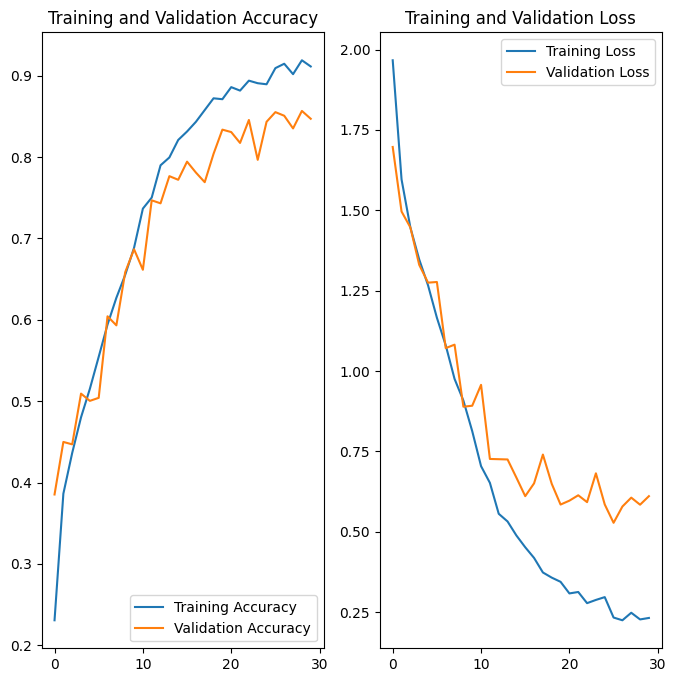

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Analysis:**
- Training accuracy: 90% and Validation accuracy: 85%
- Balancing the classes helped in improving the accuracy drastically.
- Overfitting/Underfitting issues is resolved.
- Overall model is good but can further fine tune with more layers, additional hyperparameter tuning - Epochs, Learning rate etc.